In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

In [2]:
def Plotter(e):

  fig = plt.figure(figsize=(8,3))
  ax =fig.add_subplot(121)
  ax1 =fig.add_subplot(122)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return ax,ax1

(<Axes: title={'center': 'Epoch: 10'}>, <Axes: >)

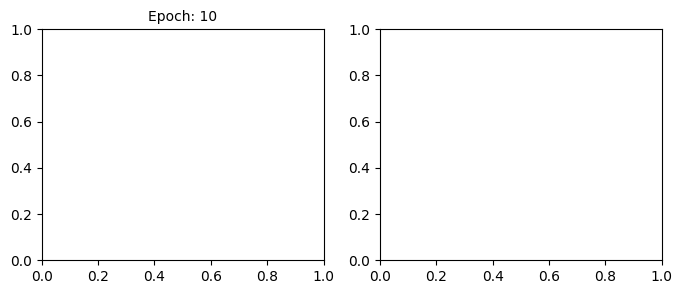

In [3]:
Plotter(10)

In [4]:
def f(x):
  return x**2 + 10*np.sin(x)

In [5]:
xvalues = np.linspace(-10,10,50)
yvalues = f(xvalues)

In [6]:
def Derivative(f,x,h=1e-5):
  return (f(x+h)-f(x-h))/(2*h)

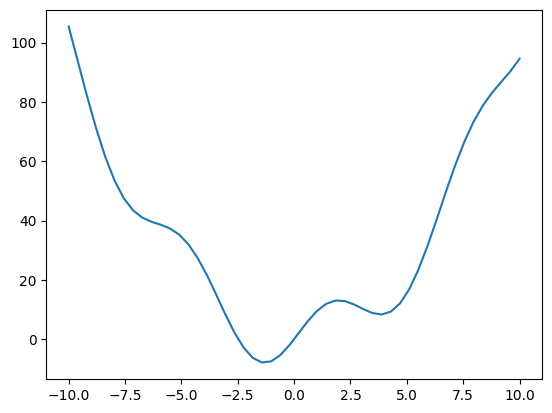

In [7]:
plt.plot(xvalues,yvalues)

In [8]:
def GradientDescent(f,epochs=100,lr=0.05):

  # Semilla
  xn = np.random.randint(-20,20,10)

  # Guadamos el valor de la funcion
  fxn = f(xn)

  # Vamos a guardar en una estrucutra de datos stack
  History = np.array([f(xn)])

  for e in range(epochs):

    # Algoritmo
    xn1 = xn - lr*Derivative(f,xn) # descenso para minimizar
    # Actualizamos
    xn = xn1

    History = np.vstack((History,f(xn)))

    clear_output(wait=True)

    ax,ax1 = Plotter(e)
    ax.plot(xvalues,yvalues)
    ax.scatter(xn,f(xn),color='red')
    ax1.plot(History[:e,:])
    plt.show()

    print(xn)
    # Calculamos la diferencia entre iteraciones consecutivas
    tolerancia = np.abs( History[-1] - History[-2] )
    print(tolerancia)

    time.sleep(0.01)

    # Criterior de parada
    if np.all( tolerancia < 1e-5 ):
      print('final:',e)
      break

  return xn

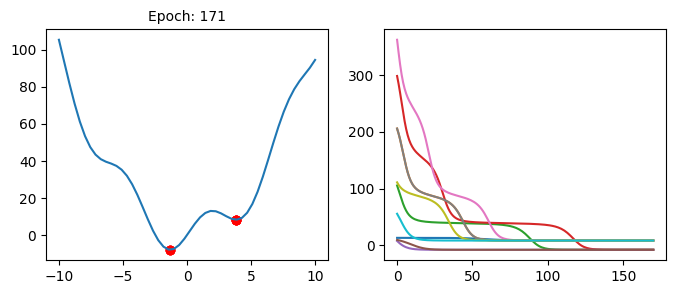

[ 3.83737272  3.83748613 -1.30650635 -1.30875867 -1.30644001 -1.30644
  3.83755209  3.83748613  3.83747537  3.83746762]
[7.19511206e-09 2.92361690e-10 7.21063653e-09 8.81325032e-06
 8.88178420e-16 8.88178420e-16 5.83516879e-09 2.92361690e-10
 5.51345636e-11 2.16715534e-13]
final: 171


In [9]:
xn = GradientDescent(f,epochs=1000,lr=0.01)

In [10]:
xn

array([ 3.83737272,  3.83748613, -1.30650635, -1.30875867, -1.30644001,
       -1.30644   ,  3.83755209,  3.83748613,  3.83747537,  3.83746762])